## Exploratory and Predictive Analysis of Heart Data

### 1. Definitions

<code>
Var	Name	Description	Range/Codes
--------------------------------------------------------------------------
1	lexam	Last exam		2-16 for 1997 subjects who died
				     just prior to last exam
				16 for 3218 subjects who were alive 
 				     at exam 16

2	surv	Survival		0 = alive at exam 16
				1 = died prior to exam 16

3	cause	Cause of death	0 = still alive
				1 = sudden death from CHD
				2 = other coronary heart disease
				3 = stroke (CVA)
				4 = other cerebral vascular disease
				5 = cancer
				6 = other causes of death
				9 = cause unknown

4	cexam	Exam 1st CHD	1-16: exam at which CHD first diagnosed
				0 = CHD never diagnosed

5	chd	Death from CHD	1 = Death from cause 1 or 2
				0 = Alive or death from other cause

6	cva	Death from CVD	1 = Death from cause 3 or 4
				0 = Alive or death from other cause

7	ca	Death from CA	1 = Death from cause 5
				0 = Alive or death from other cause

8	oth	Death from OTH	1 = Death from cause 3-9
				0 = Alive or death from CHD

9	sex	Sex		1 = Male
				2 = Female

10	age	Age 		28-62 age (years) at first exam

11	ht	Height		51.5 - 76.5 height (inches) 1st exam
				6 missing values (-1)

12	wt	Weight		67 - 300 weight (pounds) 1st exam
				6 missing values (-1)

13	scl1	SC Exam 1		96 - 503 serum cholesterol (mg/100ml)
				2,037 missing values (-1)*

14 	scl2	SC Exam 2		115 - 568 serum cholesterol (mg/100ml)
				626 missing values (-1)*

15	dbp	Diastolic 	50 - 160 mm/Hg 1st exam
		Blood Pressure

16	sbp	Systolic		82 - 300 mm/Hg 1st exam
		Blood Pressure

17	mrw	Metropolitan	67 - 238 percent of "normal"
		Relative Weight	6 missing values (-1)

18	smok	Amount smoked	0 - 60 cigarettes per day (exam 1)
				36 missing values (-1)
_________________________________________________________________________
* 152 subjects are missing serum cholesterol at BOTH exams

<code>

### 2. Setup

##### Import Packages

In [71]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##### Import Data

In [72]:
data = pd.read_csv('fram.csv')


In [73]:
data.head()

lexam  surv  cause  cexam  chd  cva  ca  oth  sex  age     ht   wt  scl1  \
0     13     1      6      0    0    0   0    1    2   29  62.50  140    -1   
1      8     1      5      0    0    0   1    1    2   41  59.75  194    -1   
2     16     0      0      0    0    0   0    0    2   57  62.25  132    -1   
3     16     0      0      0    0    0   0    0    2   39  65.75  158    -1   
4     16     0      0      0    0    0   0    0    1   42  66.00  156    -1   

   scl2  dbp  sbp  mrw  smok  
0    -1   78  124  121     0  
1   181   92  144  183     0  
2   250   90  170  114    10  
3   242   80  128  123     0  
4   281   76  110  116    20

In [74]:
print(f"The data has {data.shape[0]} rows and {data.shape[1]} columns.")

The data has 5209 rows and 18 columns.


##### Uniqueness of Data

In [75]:
dict = {}
for i in list(data.columns):
    dict[i] = data[i].value_counts().shape[0]

pd.DataFrame(dict, index=["unique count"]).transpose()

unique count
lexam            15
surv              2
cause             8
cexam            17
chd               2
cva               2
ca                2
oth               2
sex               2
age              35
ht               88
wt              178
scl1            210
scl2            247
dbp              63
sbp             109
mrw             142
smok             15

##### Staistic of continuous attributes

In [76]:
con_attr = ['age', 'ht', 'wt', 'scl1', 'scl2', 'dbp', 'sbp', 'mrw', 'smok']
disc_attr = ['lexam', 'surv', 'cause', 'cexam', 'chd', 'cva', 'ca', 'oth', 'sex']

data[con_attr].describe().transpose()

count        mean         std   min     25%    50%    75%    max
age   5209.0   44.068727    8.574954  28.0   37.00   43.0   51.0   62.0
ht    5209.0   64.737378    4.219635  -1.0   62.25   64.5   67.5   76.5
wt    5209.0  152.909196   29.367677  -1.0  132.00  150.0  172.0  300.0
scl1  5209.0  134.331734  114.006798  -1.0   -1.00  180.0  226.0  503.0
scl2  5209.0  200.636015   85.566341  -1.0  183.00  217.0  249.0  568.0
dbp   5209.0   85.358610   12.973091  50.0   76.00   84.0   92.0  160.0
sbp   5209.0  136.909580   23.739596  82.0  120.00  132.0  148.0  300.0
mrw   5209.0  119.818199   20.389030  -1.0  106.00  118.0  131.0  268.0
smok  5209.0    9.294874   12.020520  -1.0    0.00    1.0   20.0   60.0

##### Check for missing values

In [77]:
data.isnull().sum()

lexam    0
surv     0
cause    0
cexam    0
chd      0
cva      0
ca       0
oth      0
sex      0
age      0
ht       0
wt       0
scl1     0
scl2     0
dbp      0
sbp      0
mrw      0
smok     0
dtype: int64

##### Clean Data

In [81]:
data = data.replace(-1,np.nan)

### 3. Exploratory Analysis

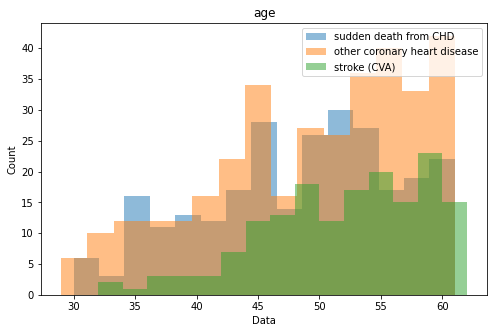

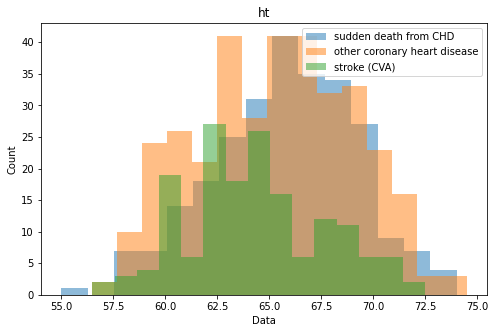

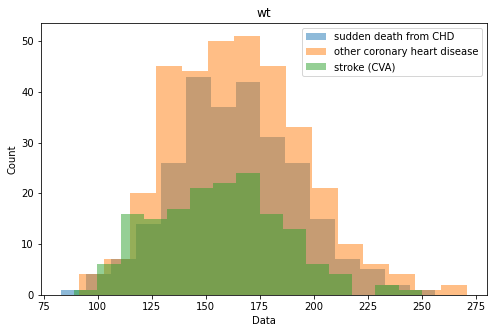

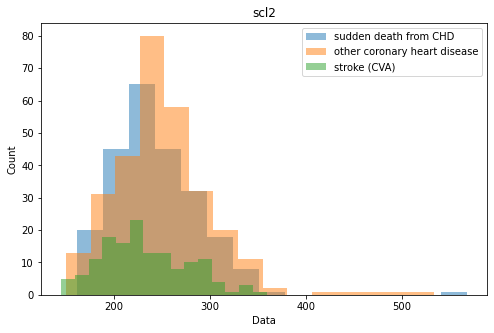

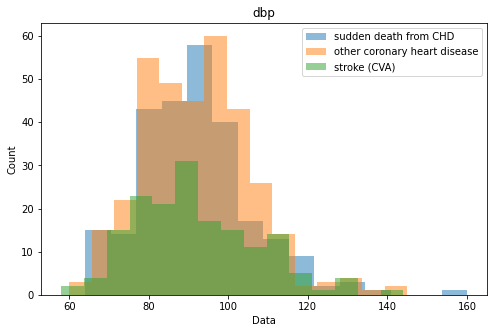

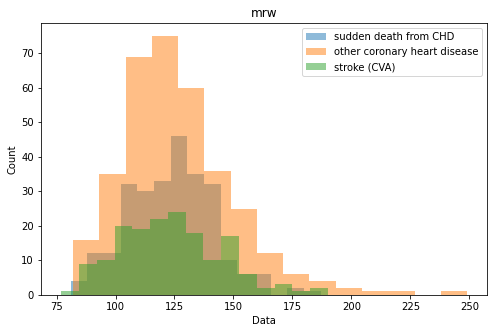

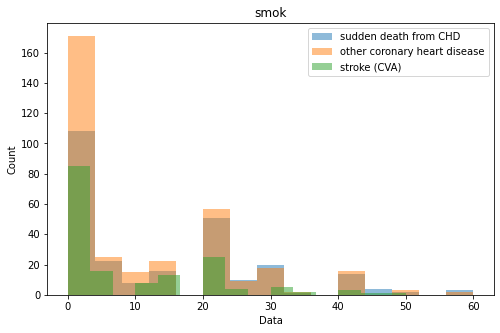

In [84]:
cause_of_death = {
#    0 : "still alive",
    1 : "sudden death from CHD",
    2 : "other coronary heart disease",
    3 : "stroke (CVA)",
#    4 : "other cerebral vascular disease",
#    5 : "cancer",
#    6 : "other causes of death",
#    9 : "cause unknown",
}

def plot_attribute_dist_by_output(data:pd.DataFrame, attribute:str) -> None:
    ax, fig = plt.subplots(figsize=(8,5))
    plt.title(attribute)
    for cause in cause_of_death.keys():
        plt.hist(data[data['cause']==cause][attribute], bins=15, 
            alpha=0.5, label=cause_of_death[cause])
    plt.xlabel("Data")
    plt.ylabel("Count")
    plt.legend(loc='upper right')
    plt.show()
    
for attr in con_attr:
    plot_attribute_dist_by_output(data, attr)